# 01 · Explore Car Insurance Dataset

Quick EDA on the Kaggle *Car Insurance* dataset (OUTCOME target).

In [10]:
import kagglehub, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

path = kagglehub.dataset_download("sagnik1511/car-insurance-data")
csvs = list(Path(path).rglob("*.csv"))
csvs


[WindowsPath('C:/Users/User/.cache/kagglehub/datasets/sagnik1511/car-insurance-data/versions/1/Car_Insurance_Claim.csv')]

In [11]:
df = pd.read_csv(csvs[0])
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## Basic info & summary

In [12]:
import pandas as pd
display(pd.DataFrame({"dtype": df.dtypes.astype(str), "nunique": df.nunique()}))
df.isna().mean().sort_values(ascending=False).head(20)

,dtype,nunique
ID,int64,10000
AGE,object,4
GENDER,object,2
RACE,object,2
DRIVING_EXPERIENCE,object,4
EDUCATION,object,3
INCOME,object,4
CREDIT_SCORE,float64,9018
VEHICLE_OWNERSHIP,float64,2
VEHICLE_YEAR,object,2


CREDIT_SCORE           0.0982
ANNUAL_MILEAGE         0.0957
ID                     0.0000
GENDER                 0.0000
AGE                    0.0000
EDUCATION              0.0000
RACE                   0.0000
INCOME                 0.0000
VEHICLE_OWNERSHIP      0.0000
VEHICLE_YEAR           0.0000
DRIVING_EXPERIENCE     0.0000
MARRIED                0.0000
CHILDREN               0.0000
POSTAL_CODE            0.0000
VEHICLE_TYPE           0.0000
SPEEDING_VIOLATIONS    0.0000
DUIS                   0.0000
PAST_ACCIDENTS         0.0000
OUTCOME                0.0000
dtype: float64

## Target balance (`OUTCOME`)

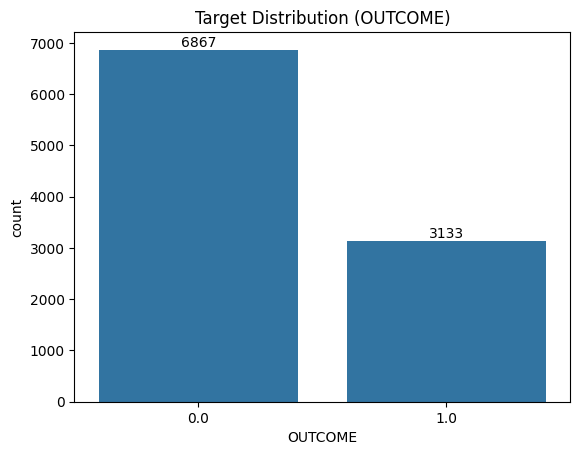

In [13]:
assert "OUTCOME" in df.columns
ax = sns.countplot(x="OUTCOME", data=df)
ax.set_title("Target Distribution (OUTCOME)")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.show()

## Categorical distributions

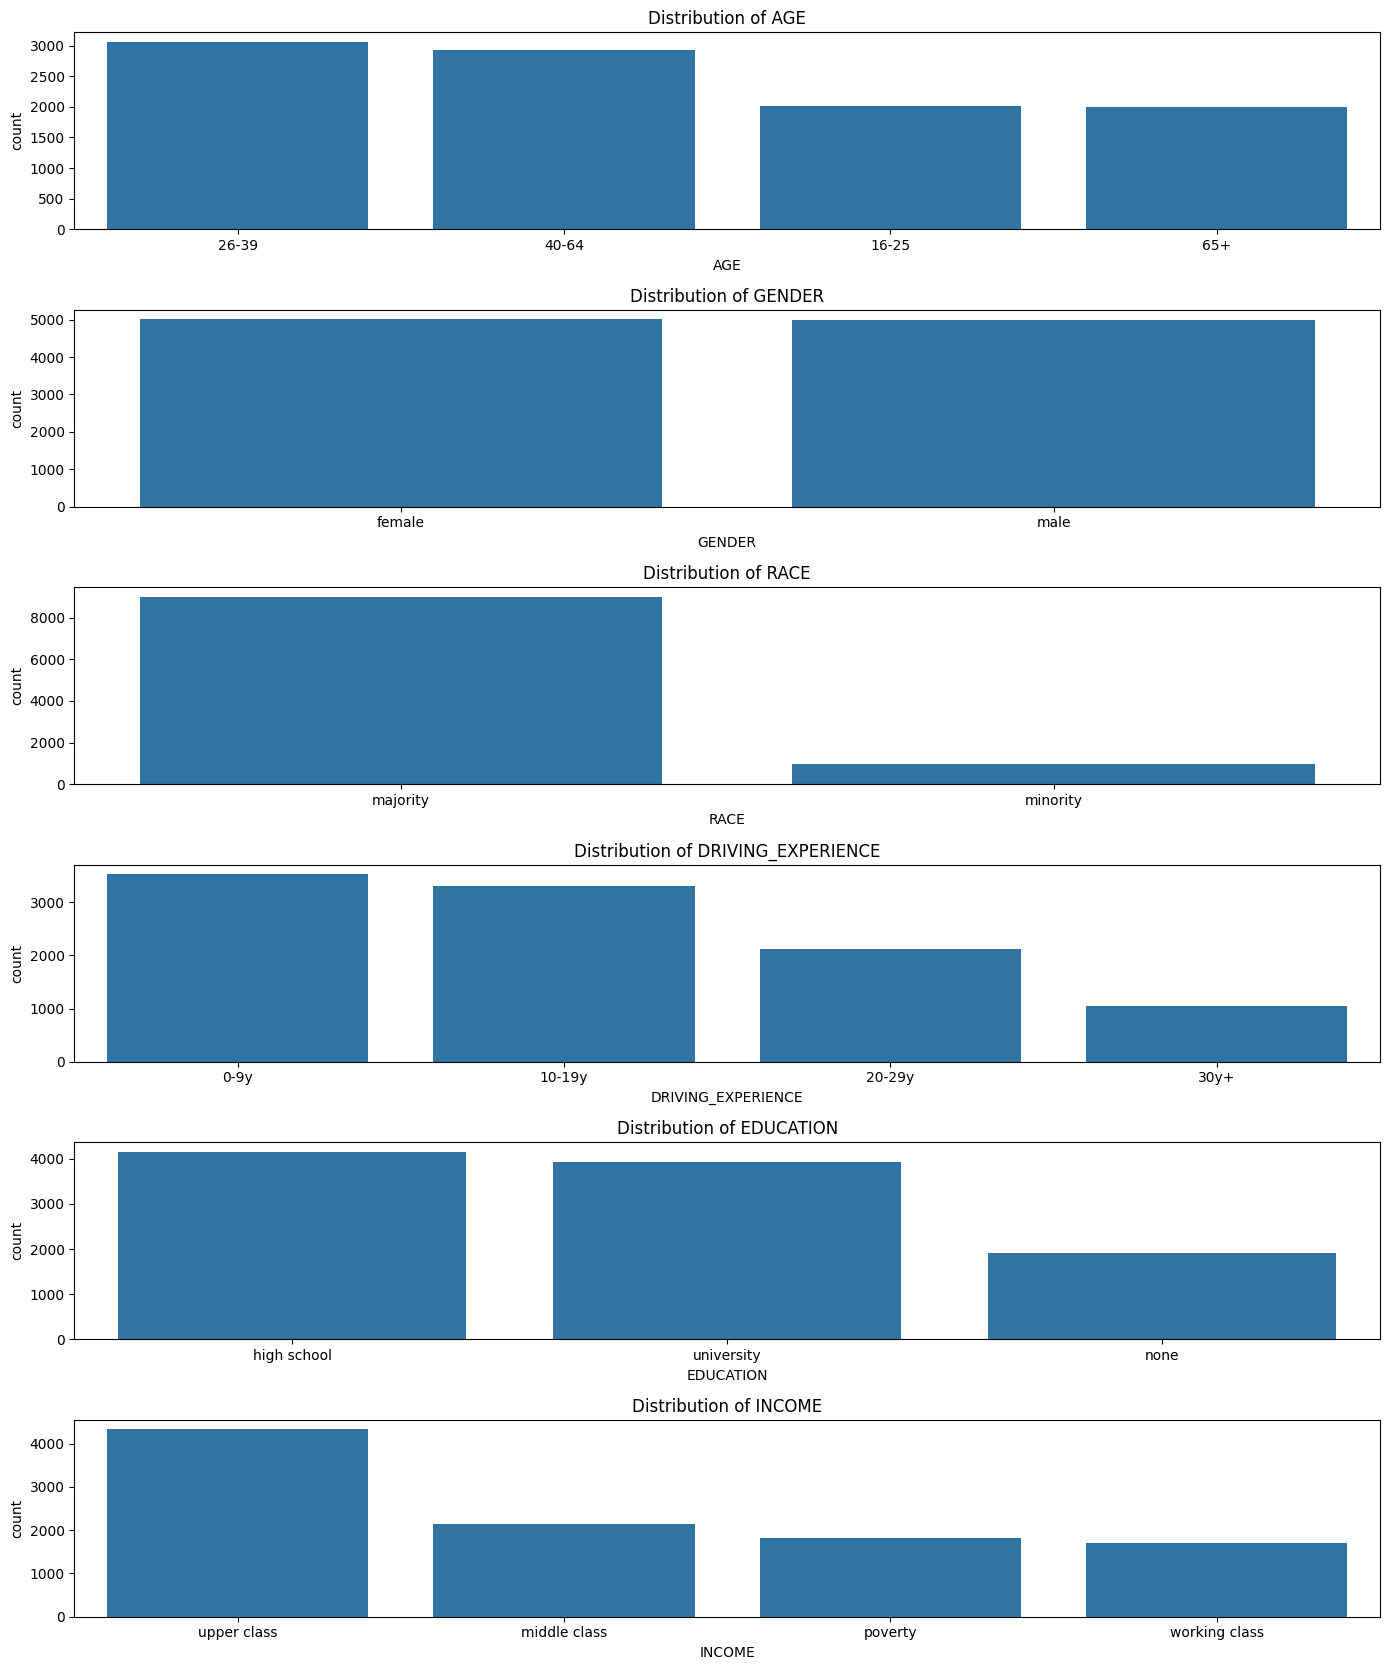

In [14]:
cat_cols = [c for c in df.columns if df[c].dtype=='object' or df[c].nunique()<=12]
cat_cols = [c for c in cat_cols if c != "OUTCOME"]
n = min(6, len(cat_cols))
import math
rows = n
plt.figure(figsize=(14, 2.8*rows))
for i, col in enumerate(cat_cols[:n], 1):
    plt.subplot(rows, 1, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.show()

## Numeric distributions & correlations

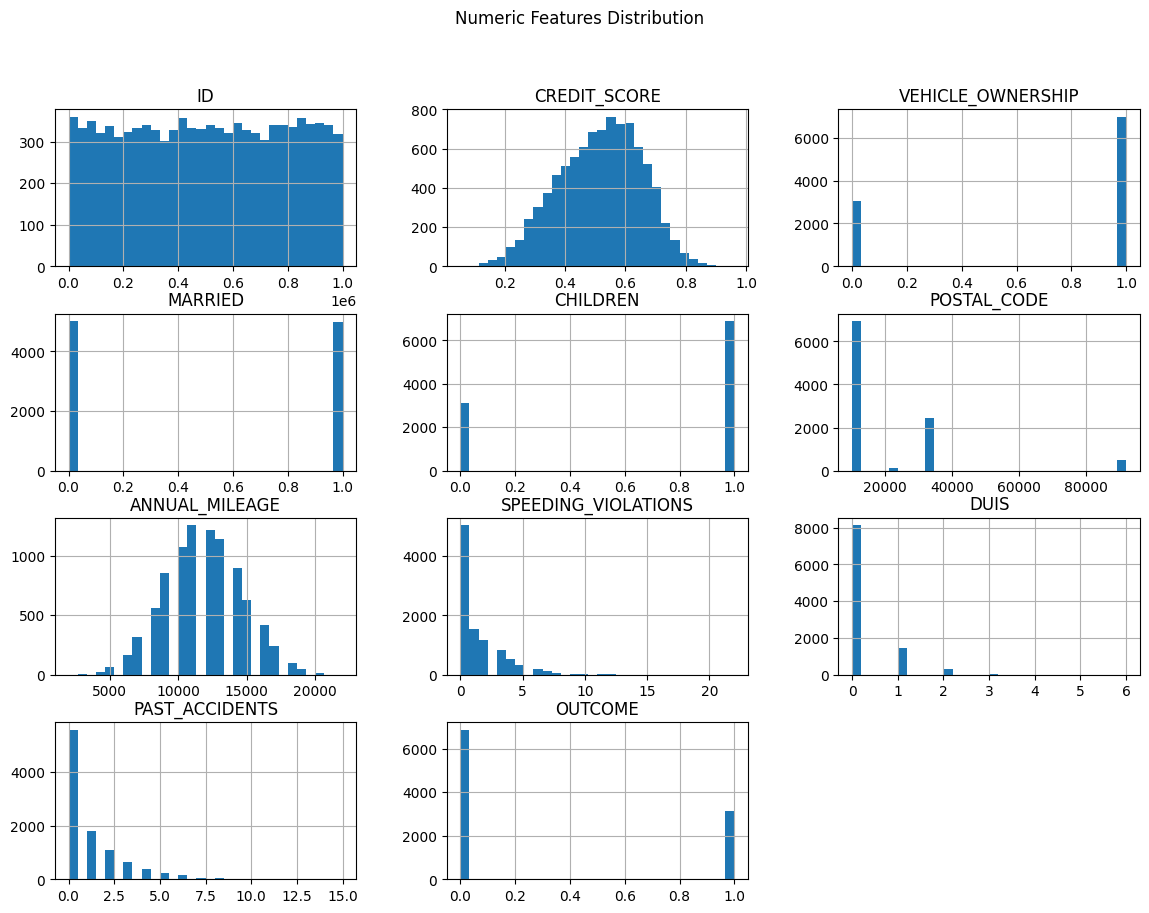

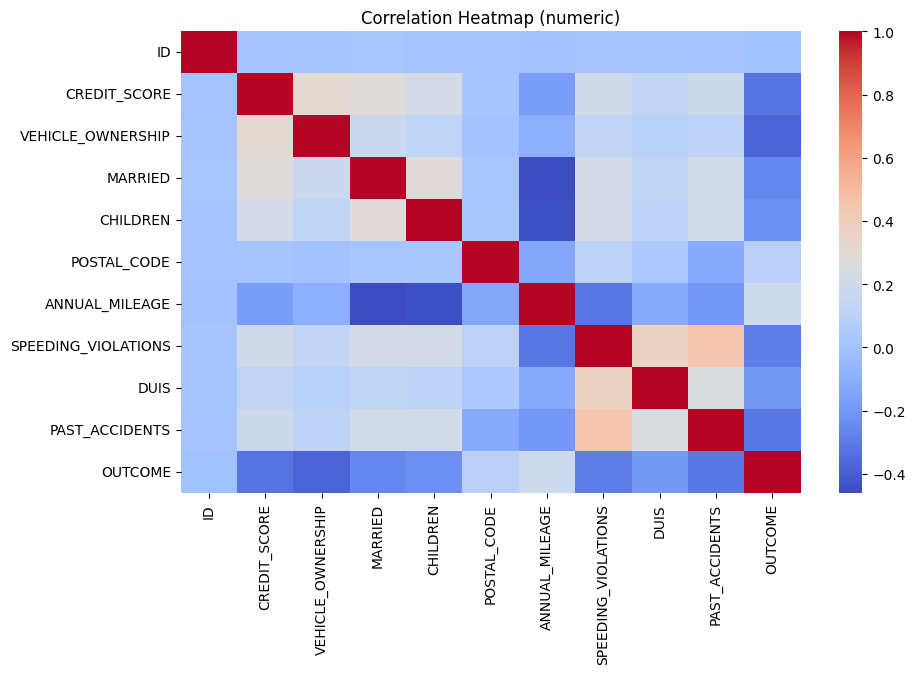

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(figsize=(14, 10), bins=30)
plt.suptitle("Numeric Features Distribution"); plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (numeric)"); plt.show()